In [39]:
#Cargamos las librerías utilizadas para la realización de esta defensa.
library(readxl)
library(tidyverse)
library(ggplot2)
library(scales)
library(stringr)
library(nortest)
library(corrplot)
library(PerformanceAnalytics)

In [2]:
#Comenzamos cargando la base de datos
options(warn=-1)
base_datos <- read_excel("C:\\Users\\patoa\\OneDrive\\Escritorio\\Anchu\\Exploracion de datos multi\\DIAMANTE3.xlsx")

# Base de datos para Secundaria

In [3]:
#Aplicamos los filtros correspondientes
bd_secundaria <- filter(base_datos, Modalidad == "Secundaria")
bd_secundaria <- filter(bd_secundaria, NivelEnsenanza == "SECUNDARIO" | NivelEnsenanza == "EGB 3")
bd_secundaria <- filter(bd_secundaria, ModEnsenaza == "Comun")
bd_secundaria <- select(bd_secundaria, CUE,EsPrivada,turno,curso,periodoEvaluatorio,Documento,anioLectivo,
                        asignatura,nota,orden,Nivel,Modalidad,ModEnsenaza)
bd_secundaria <- rename(bd_secundaria, Año = anioLectivo, Materia = asignatura, Nota = nota, 
                        DNI = Documento, Turno = turno, PeriodoEvaluatorio = periodoEvaluatorio)
bd_secundaria <- filter(bd_secundaria, Año == 2022)
Curso <- str_sub(bd_secundaria$curso,1,1)
bd_secundaria <- cbind(bd_secundaria[,1:3],Curso,bd_secundaria[,5:13])
bd_secundaria <- na.omit(bd_secundaria)




# Base de datos para Primaria

In [5]:
#Mismo procedimiento para la primaria
bd_primaria <- filter(base_datos, Modalidad == "Primaria")
bd_primaria <- filter(bd_primaria, NivelEnsenanza == "PRIMARIO")
bd_primaria  <- filter(bd_primaria, ModEnsenaza == "Comun")
bd_primaria <- select(bd_primaria, CUE,EsPrivada,turno,curso,periodoEvaluatorio,Documento,anioLectivo,
                        asignatura,nota,orden,Nivel,Modalidad,ModEnsenaza)
#Acondicionamiento de la base de datos generada
bd_primaria<- rename(bd_primaria, Año = anioLectivo, Materia = asignatura, Nota = nota, 
                        DNI = Documento, Turno = turno, PeriodoEvaluatorio = periodoEvaluatorio)
bd_primaria <- filter(bd_primaria, Año == 2022)
bd_primaria$Materia <- toupper(bd_primaria$Materia)
Curso <- str_sub(bd_primaria$curso,1,1)
bd_primaria <- cbind(bd_primaria[,1:3],Curso,bd_primaria[,5:13])
bd_primaria <- na.omit(bd_primaria)

# Creación de un dataset con la columna promedios

In [6]:
#Para secundaria
PrimerT_sec <- filter(bd_secundaria, PeriodoEvaluatorio == "Primer Trimestre")
PrimerT_sec <- rename(PrimerT_sec, NotasPTS = Nota)
SegundoT_sec <- filter(bd_secundaria, PeriodoEvaluatorio == "Segundo Trimestre")
SegundoT_sec <- rename(SegundoT_sec, NotasSTS = Nota)
TercerT_sec <- filter(bd_secundaria, PeriodoEvaluatorio == "Tercer Trimestre")
TercerT_sec <- rename(TercerT_sec, NotasTTS = Nota)
#----------------------------------------------------------------------------------------------
dataset_merge_trimestres <- merge(x = PrimerT_sec, y = SegundoT_sec, by = c("DNI", "Materia"))
notas_trimestres <- merge(x= dataset_merge_trimestres, y =TercerT_sec, by = c("DNI", "Materia"))
#------------------------------------------------------------------------------------------------
#Creamos la columna promedios
notas_trimestres <- select(notas_trimestres,CUE, EsPrivada,Turno, Curso,PeriodoEvaluatorio,Año,DNI,Materia,NotasPTS,NotasSTS,NotasTTS)
notas_trimestres$NotasPTS <- as.numeric(notas_trimestres$NotasPTS)
notas_trimestres$NotasSTS <- as.numeric(notas_trimestres$NotasSTS)
notas_trimestres$NotasTTS <- as.numeric(notas_trimestres$NotasTTS)
secundaria_promedios <- mutate(notas_trimestres, Promedio = (NotasPTS+NotasSTS+NotasTTS)/3)

In [7]:
#Mismo procedimiento para la Primaria
PrimerT_prim <- filter(bd_primaria, PeriodoEvaluatorio == "Primer Trimestre")
PrimerT_prim <- rename(PrimerT_prim, NotasPTP = Nota)
SegundoT_prim <- filter(bd_primaria, PeriodoEvaluatorio == "Segundo Trimestre")
SegundoT_prim <- rename(SegundoT_prim, NotasSTP = Nota)
TercerT_prim <- filter(bd_primaria, PeriodoEvaluatorio == "Tercer Trimestre")
TercerT_prim <- rename(TercerT_prim, NotasTTP = Nota)
#-----------------------------------------------------------------------------------------
dataset_merge_trimestres_prim <- merge(x = PrimerT_prim, y = SegundoT_prim, by = c("DNI", "Materia"))
notas_trimestres_primaria <- merge(x= dataset_merge_trimestres_prim, y =TercerT_prim, by = c("DNI", "Materia"))
#---------------------------------------------------------------------------------------------------
notas_trimestres_primaria <- select(notas_trimestres_primaria,CUE, EsPrivada,Turno, Curso,PeriodoEvaluatorio,Año,DNI,Materia,NotasPTP,NotasSTP,NotasTTP)
notas_trimestres_primaria$NotasPTP <- as.numeric(notas_trimestres_primaria$NotasPTP)
notas_trimestres_primaria$NotasSTP <- as.numeric(notas_trimestres_primaria$NotasSTP)
notas_trimestres_primaria$NotasTTP <- as.numeric(notas_trimestres_primaria$NotasTTP)
primaria_promedios <- mutate(notas_trimestres_primaria, Promedio = (NotasPTP+NotasSTP+NotasTTP)/3)




# Averiguamos la representatividad de nuestro dataset

In [19]:
#Para primaria
length(unique(primaria_promedios$DNI))
#Para secundaria, primero separamos cada curso
primero <- filter(secundaria_promedios, Curso == 1)
segundo <- filter(secundaria_promedios, Curso == 2)
tercero <- filter(secundaria_promedios, Curso == 3)
cuarto <- filter(secundaria_promedios, Curso == 4)
quinto <- filter(secundaria_promedios, Curso == 5)
sexto <- filter(secundaria_promedios, Curso == 6)

#Luego calculamos la matricula de cada uno
length(unique(primero$DNI))
length(unique(segundo$DNI))
length(unique(tercero$DNI))
length(unique(cuarto$DNI))
length(unique(quinto$DNI))
length(unique(sexto$DNI))

[1] 5399

[1] 474

[1] 415

[1] 340

[1] 356

[1] 299

[1] 331

# Análisis gráfico

In [ ]:
#Distribución de estudiantes por nivel de enseñanza
primaria <- length(unique(primaria_promedios$DNI))
secundaria <- length(unique(secundaria_promedios$DNI))

Nivel <- data.frame("Nivel" = c("Primaria", "Secundaria"),
                   "Cantidad" = c(primaria, secundaria))

pie(Nivel$Cantidad, labels = Nivel$Nivel, main = "Distribución de los alumnos por Nivel de Enseñanza",
   sub= "Fuente de elaboración propia", col = rainbow(2))

porcentajes <- paste0(percent(Nivel$Cantidad/sum(Nivel$Cantidad)), " (", Nivel$Cantidad, ")")
legend("topright", legend = porcentajes, cex = 0.8, fill = rainbow(2))

In [ ]:
# Distribución de estudiantes por Gestion (Primaria)
priv_prim <- filter(primaria_promedios, EsPrivada == "S")
pub_prim <- filter(primaria_promedios, EsPrivada == "N")
alumnospgest_prim <- data.frame("Gestion" = c("Pública", "Privada"),
                           "Cantidad" = c(length(unique(pub_prim$DNI)),length(unique(priv_prim$DNI))))

alumnospgest_prim$Gestion <- as.factor(alumnospgest_prim$Gestion)

colors = c('#4286f4','#bb3af2')
pie(alumnospgest_prim$Cantidad, labels = alumnospgest_prim$Gestion, main = "Alumnos por tipo de gestión en escuelas primarias",
    col = colors, sub = "Fuente de elaboración propia")

# Agregar los porcentajes
porcentajes <- paste0(percent(alumnospgest_prim$Cantidad/sum(alumnospgest_prim$Cantidad)), " (", alumnospgest_prim$Cantidad, ")")
legend("topright", legend = porcentajes, cex = 0.8, fill = colors)

In [ ]:
# Distribución de estudiantes por Gestion (Secundaria)
priv_sec <- filter(secundaria_promedios, EsPrivada == "S")
pub_sec <- filter(secundaria_promedios, EsPrivada == "N")
alumnospgest_sec <- data.frame("Gestion" = c("Pública", "Privada"),
                           "Cantidad" = c(length(unique(pub_sec$DNI)),length(unique(priv_sec$DNI))))

alumnospgest_sec$Gestion <- as.factor(alumnospgest_sec$Gestion)

colors = c('#4286f4','#bb3af2')
pie(alumnospgest_sec$Cantidad, labels = alumnospgest_sec$Gestion, main = "Alumnos por tipo de gestión en escuelas secundarias",
    col = colors, sub = "Fuente de elaboración propia")

# Agregar los porcentajes
porcentajes <- paste0(percent(alumnospgest_sec$Cantidad/sum(alumnospgest_sec$Cantidad)), " (", alumnospgest_sec$Cantidad, ")")
legend("topright", legend = porcentajes, cex = 0.8, fill = colors)

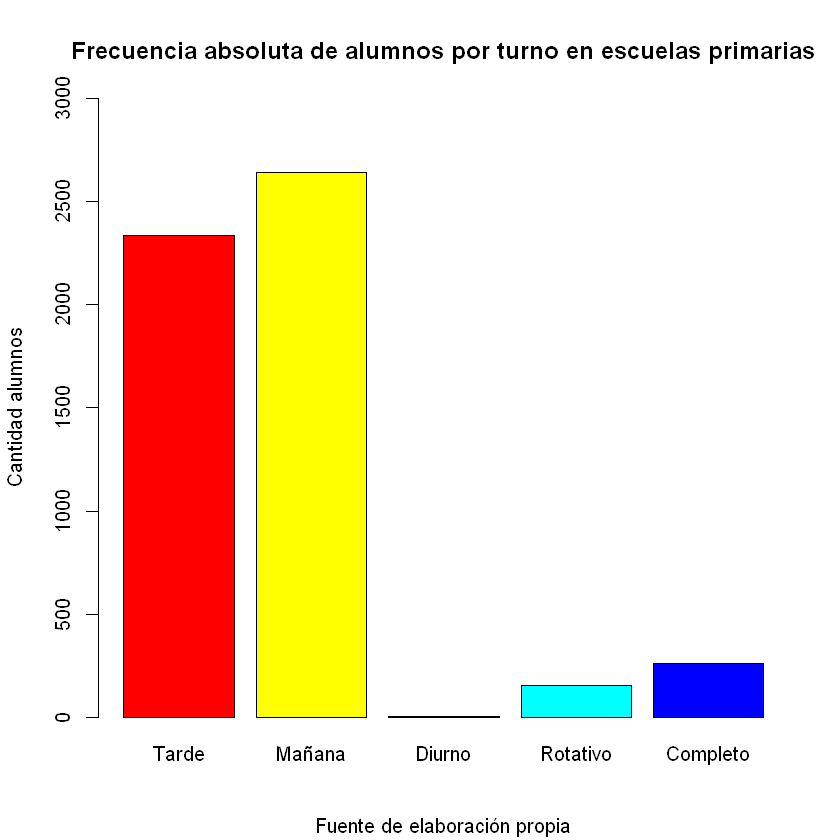

In [35]:
#Distribución por turnos en primaria
tarde_prim <- filter(primaria_promedios, Turno == "TARDE")
mañana_prim <- filter(primaria_promedios, Turno == "MAÑANA")
diurno_prim <- filter(primaria_promedios, Turno == "DIURNO")
rot_prim <- filter(primaria_promedios, Turno == "ROTATIVO")
comp_prim <- filter(primaria_promedios, Turno == "COMPLETO")

ptarde <- length(unique(tarde_prim$DNI))
pmañana <- length(unique(mañana_prim$DNI))
pdiurno <- length(unique(diurno_prim$DNI))
prot <- length(unique(rot_prim$DNI))
pcomp <- length(unique(comp_prim$DNI))

turno <- c("Tarde", "Mañana","Diurno","Rotativo","Completo")
cantidad <- c(ptarde,pmañana,pdiurno,prot,pcomp)

alumnospturnoprim <- data.frame("Turno"=turno,
           "Cantidad"=cantidad)
alumnospturnoprim$Turno <- as.factor(alumnospturnoprim$Turno)


barplot(alumnospturnoprim$Cantidad,names = alumnospturnoprim$Turno ,
        main = "Frecuencia absoluta de alumnos por turno en escuelas primarias",
        col= rainbow(6), 
        ylab = "Cantidad alumnos", 
        ylim = c(0,3000), sub = "Fuente de elaboración propia")


# Análisis gráfico

In [ ]:
#Distribución por turnos en secundaria
tarde_sec<- filter(secundaria_promedios, Turno == "TARDE")
mañana_sec <- filter(secundaria_promedios, Turno == "MAÑANA")
diurno_sec <- filter(secundaria_promedios, Turno == "DIURNO")
rot_sec <- filter(secundaria_promedios, Turno == "ROTATIVO")

starde <- length(unique(tarde_sec$DNI))
smañana <- length(unique(mañana_sec$DNI))
sdiurno <- length(unique(diurno_sec$DNI))
srot <- length(unique(rot_sec$DNI))

turno <- c("Tarde", "Mañana","Diurno","Rotativo")
cantidad <- c(starde,smañana,sdiurno,srot)

alumnospturnosec <- data.frame("Turno"=turno,
           "Cantidad"=cantidad)
alumnospturnosec$Turno <- as.factor(alumnospturnosec$Turno)


barplot(alumnospturnosec$Cantidad,names = alumnospturnosec$Turno ,main = "Frecuencia absoluta de alumnos por turno en escuelas secundarias",
        col= rainbow(6), ylab = "Cantidad alumnos", ylim = c(0,2000), sub = "Fuente de elaboración propia")

In [ ]:
#Distribución por curso en primaria
primaria_promedios$Curso <- as.factor(primaria_promedios$Curso)
prim <- filter(primaria_promedios, Curso== "1")
seg<- filter(primaria_promedios, Curso== "2")
ter<- filter(primaria_promedios, Curso== "3")
cuart<- filter(primaria_promedios, Curso== "4")
quint<- filter(primaria_promedios, Curso== "5")
sext<- filter(primaria_promedios, Curso== "6")


unop <- length(unique(prim$DNI))
dosp <- length(unique(seg$DNI))
tresp <- length(unique(ter$DNI))
cuatrop <- length(unique(cuart$DNI))
cincop <- length(unique(quint$DNI))
seisp <- length(unique(sext$DNI))



alumnospcursoprim <- data.frame("Curso" = c("PRIMERO","SEGUNDO","TERCERO","CUARTO","QUINTO","SEXTO"),
                            "Cantidad"= c(unop,dosp,tresp,cuatrop,cincop,seisp))

pie(alumnospcursoprim$Cantidad, labels = alumnospcursoprim$Curso, 
    main = "Distribución de los alumnos por curso en escuelas primarias", 
    col = rainbow(6),
    density=9,
    border= "blue",
    sub= "Fuente de elaboración propia")

porcentajes <- paste0(percent(alumnospcursoprim$Cantidad/sum(alumnospcursoprim$Cantidad)), " (", alumnospcursoprim$Cantidad, ")")
legend("topright", legend = porcentajes, cex = 0.6, fill = rainbow(6))

In [ ]:
#Distribución por curso en primaria
secundaria_promedios$Curso <- as.factor(secundaria_promedios$Curso)
prims <- filter(secundaria_promedios, Curso== "1")
segs<- filter(secundaria_promedios, Curso== "2")
ters<- filter(secundaria_promedios, Curso== "3")
cuarts<- filter(secundaria_promedios, Curso== "4")
quints<- filter(secundaria_promedios, Curso== "5")
sexts<- filter(secundaria_promedios, Curso== "6")



unos <- length(unique(prims$DNI))
doss <- length(unique(segs$DNI))
tress <- length(unique(ters$DNI))
cuatros <- length(unique(cuarts$DNI))
cincos <- length(unique(quints$DNI))
seiss <- length(unique(sexts$DNI))




alumnospcursosec <- data.frame("Curso" = c("PRIMERO","SEGUNDO","TERCERO","CUARTO","QUINTO","SEXTO"),
                            "Cantidad"= c(unos,doss,tress,cuatros,cincos,seiss))

pie(alumnospcursosec$Cantidad, labels = alumnospcursosec$Curso, 
    main = "Distribución de los alumnos por curso en escuelas secundarias", 
    col = rainbow(6),
    density=9,
    border= "blue",
    sub = "Fuente de elaboración propia")

porcentajes <- paste0(percent(alumnospcursosec$Cantidad/sum(alumnospcursosec$Cantidad)), " (", alumnospcursosec$Cantidad, ")")
legend("topright", legend = porcentajes, cex = 0.6, fill = rainbow(6))

# Boxplots e Histogramas para Matemática

# Secundaria

Promedio,frequency,acumulado
"(1.99,3.6]",7,7
"(3.6,5.2]",64,71
"(5.2,6.8]",179,250
"(6.8,8.4]",132,382
"(8.4,10]",62,444


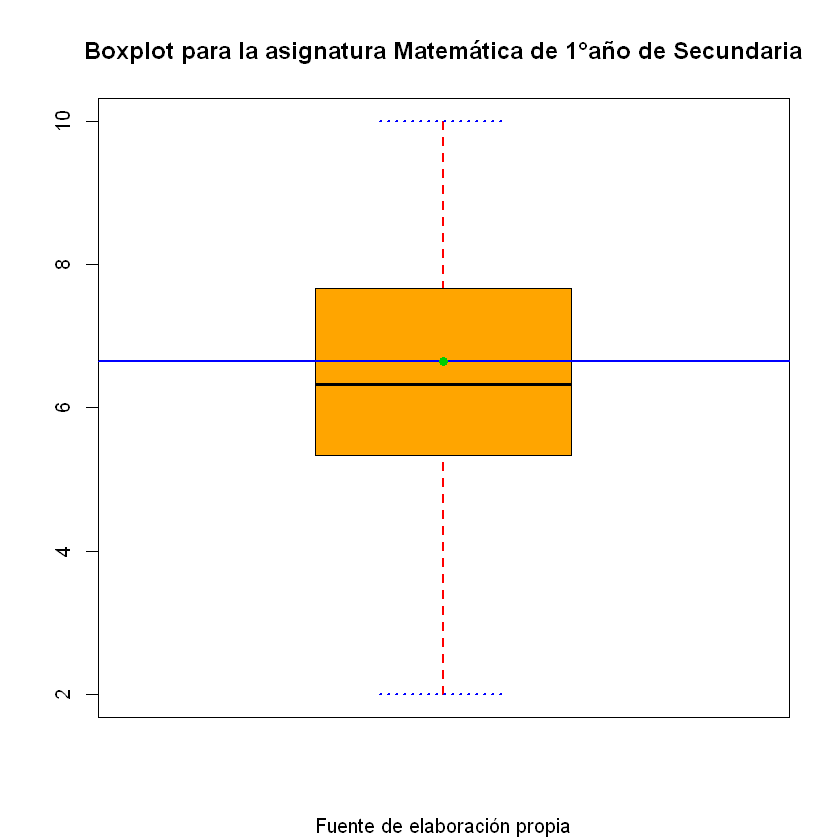

In [24]:
#Primero
sec_Mat_1 <- filter(secundaria_promedios, Curso== 1 & Materia=="MATEMATICA")


#Obtenemos los estadísticos
summary(sec_Mat_1$Promedio)


#Boxplot
boxplot(sec_Mat_1[!is.na(sec_Mat_1$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 1°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,       
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange") 

# Añadimos linea de media
abline(h = mean(sec_Mat_1[!is.na(sec_Mat_1$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(sec_Mat_1[!is.na(sec_Mat_1$Promedio),]$Promedio), col = 3, pch = 19)

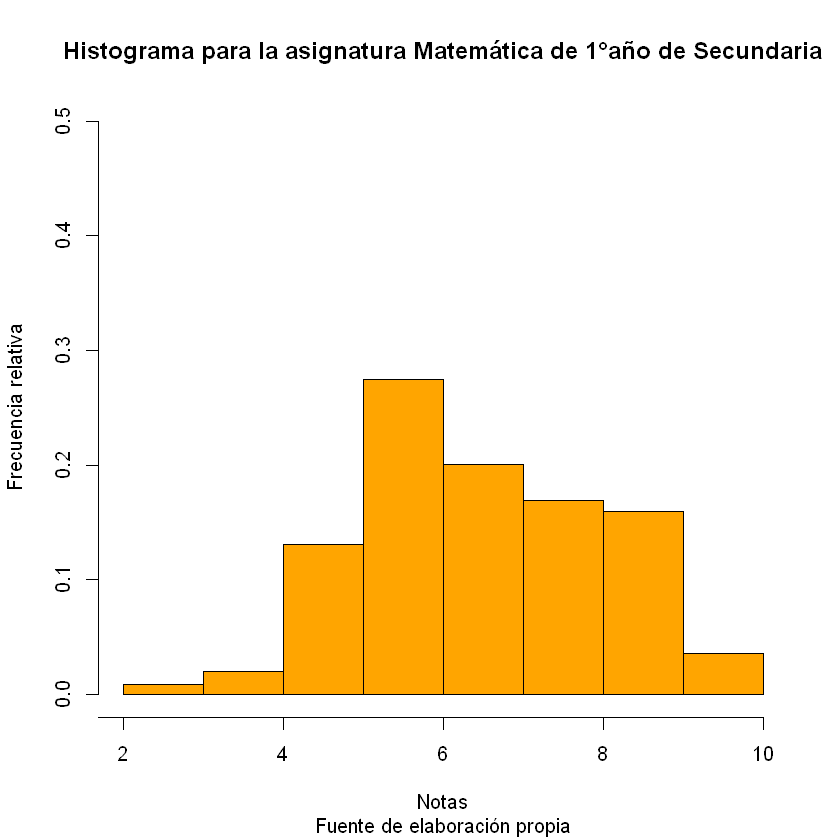

In [39]:
#Histograma para primero
hist(x = sec_Mat_1$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 1°año de Secundaria",
     sub = "Fuente de elaboración propia")

Promedio,frequency,acumulado
"(2.99,4.4]",38,38
"(4.4,5.8]",125,163
"(5.8,7.2]",97,260
"(7.2,8.6]",62,322
"(8.6,10]",50,372


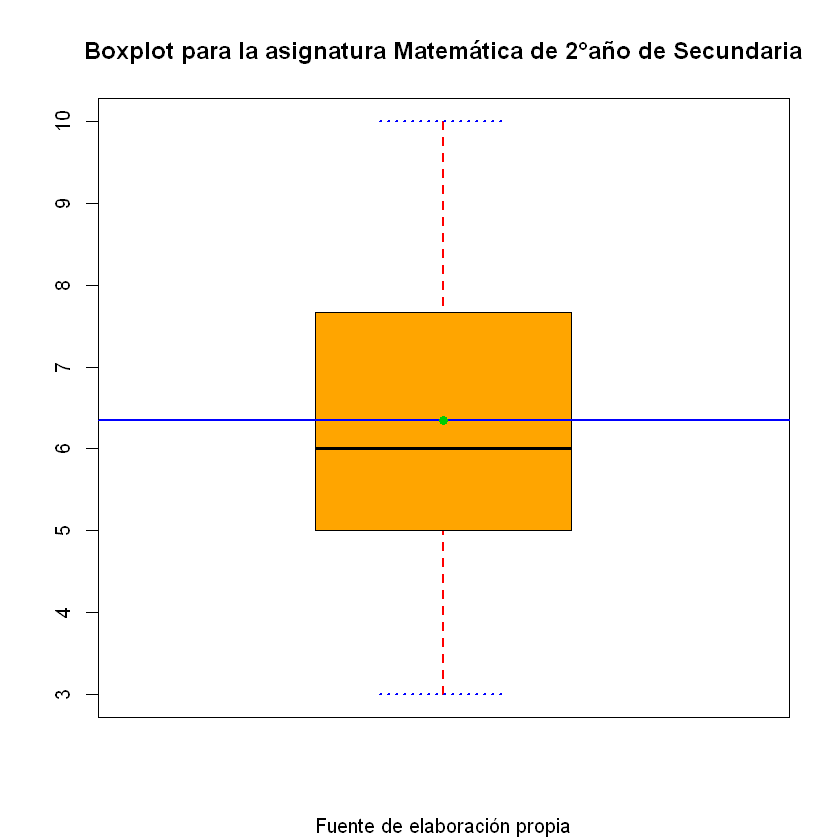

In [26]:
#Segundo
sec_Mat_2 <- filter(secundaria_promedios, Curso== 2 & Materia=="MATEMATICA")

#Obtenemos los estadísticos
summary(sec_Mat_2$Promedio)


#Boxplot
boxplot(sec_Mat_2[!is.na(sec_Mat_2$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 2°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,      
        staplecol = "blue",  
        col ="orange") 

# Añadimos linea de media
abline(h = mean(sec_Mat_2[!is.na(sec_Mat_2$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(sec_Mat_2[!is.na(sec_Mat_2$Promedio),]$Promedio), col = 3, pch = 19)

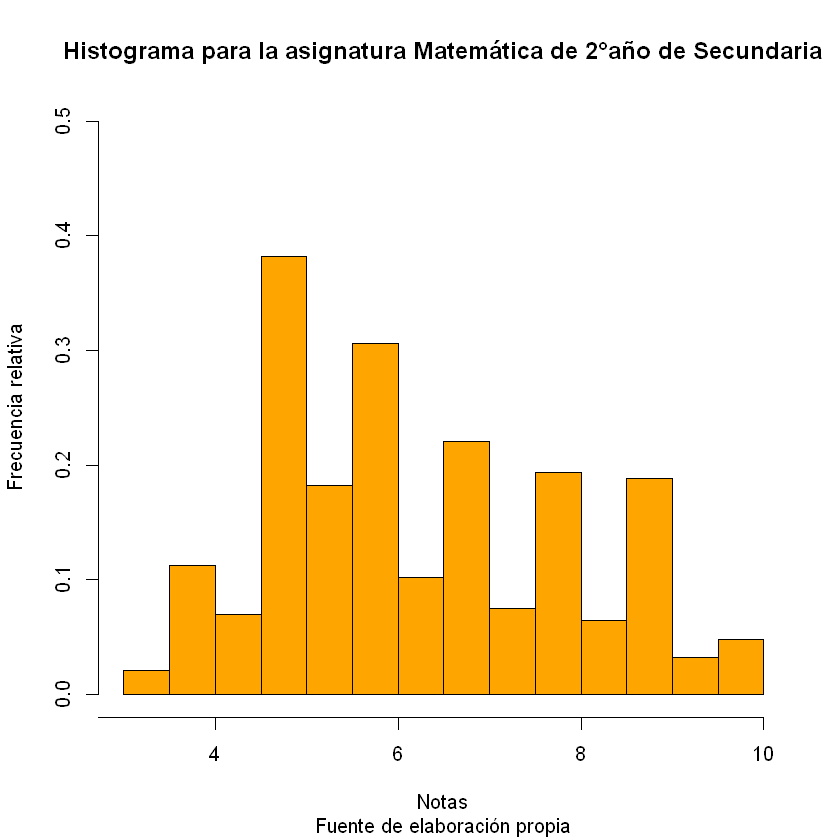

In [40]:
#Histograma para segundo
hist(x = sec_Mat_2$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 2°año de Secundaria",
     sub = "Fuente de elaboración propia")

Promedio,frequency,acumulado
"(3.99,5.2]",34,34
"(5.2,6.4]",102,136
"(6.4,7.6]",51,187
"(7.6,8.8]",85,272
"(8.8,10]",45,317


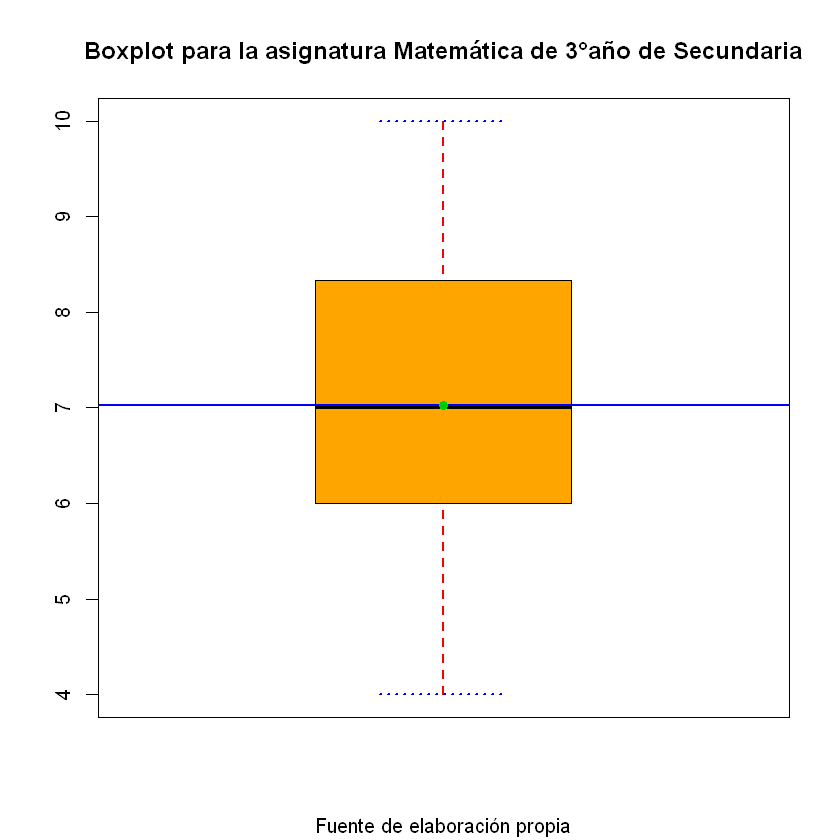

In [27]:
#Tercero 
sec_Mat_3 <- filter(secundaria_promedios, Curso== 3 & Materia=="MATEMATICA")

#Obtenemos los estadísticos
summary(sec_Mat_3$Promedio)


#Boxplot
boxplot(sec_Mat_3[!is.na(sec_Mat_3$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 3°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,      
        staplecol = "blue",  
        col ="orange") 

# Añadimos linea de media
abline(h = mean(sec_Mat_3[!is.na(sec_Mat_3$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(sec_Mat_3[!is.na(sec_Mat_3$Promedio),]$Promedio), col = 3, pch = 19)

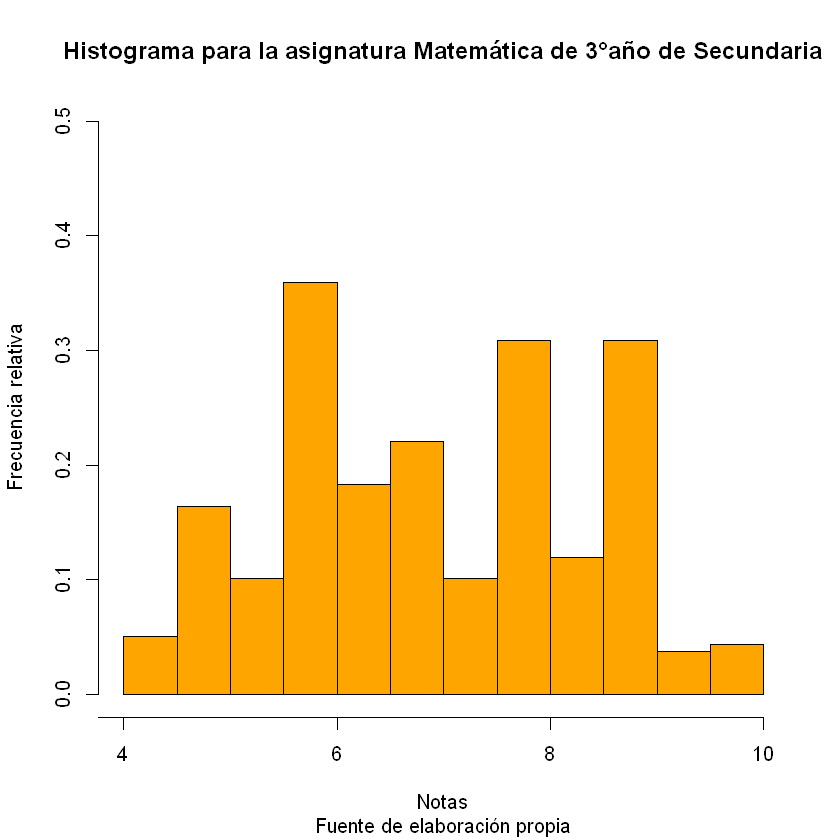

In [41]:
#Histograma para tercero
hist(x = sec_Mat_3$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 3°año de Secundaria",
     sub = "Fuente de elaboración propia")

Promedio,frequency,acumulado
"(3.33,4.67]",15,15
"(4.67,6]",97,112
"(6,7.33]",93,205
"(7.33,8.67]",70,275
"(8.67,10]",40,315


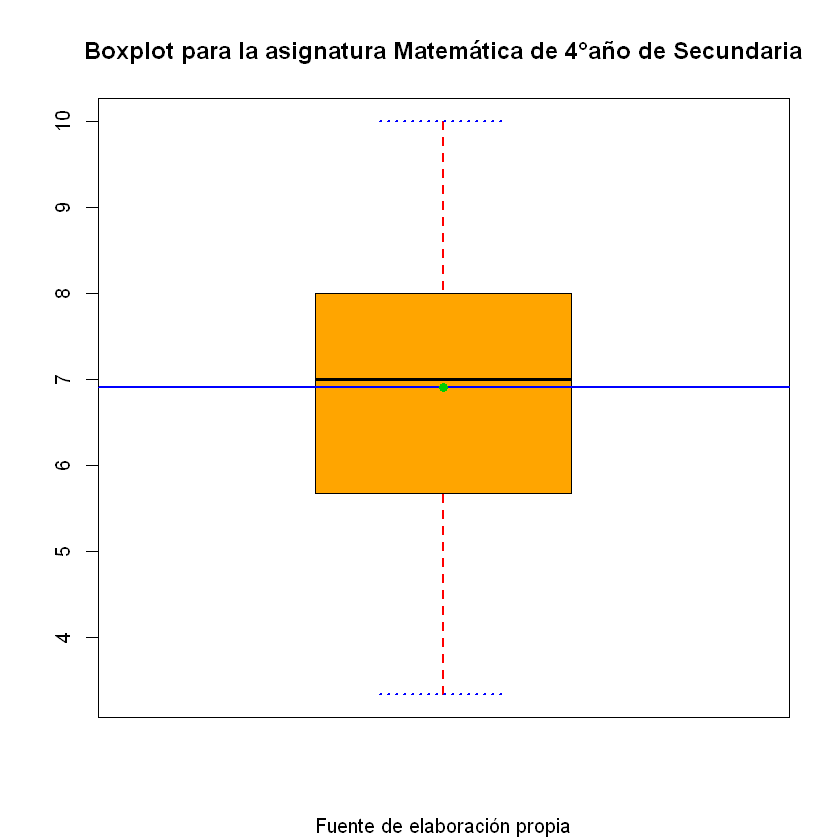

In [29]:
#Cuarto
sec_Mat_4<- filter(secundaria_promedios, Curso== 4 & Materia=="MATEMATICA")

#Obtenemos los estadísticos
summary(sec_Mat_4$Promedio)


#Boxplot
boxplot(sec_Mat_4[!is.na(sec_Mat_4$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 4°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange") 

# Añadimos linea de media
abline(h = mean(sec_Mat_4[!is.na(sec_Mat_4$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(sec_Mat_4[!is.na(sec_Mat_4$Promedio),]$Promedio), col = 3, pch = 19)

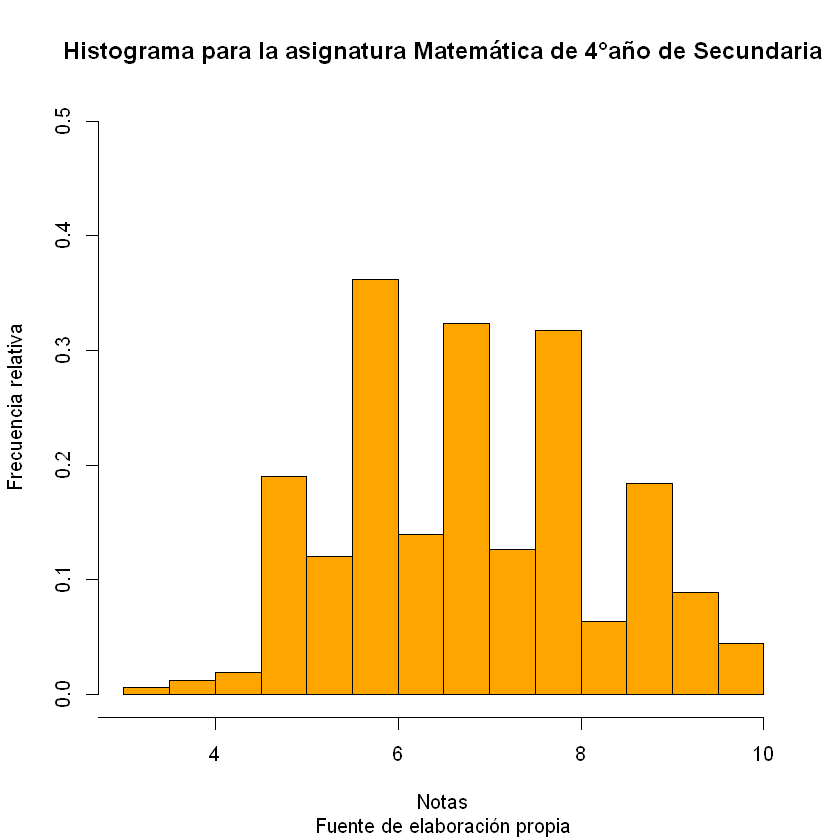

In [42]:
#Histograma para cuarto
hist(x = sec_Mat_4$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 4°año de Secundaria",
     sub = "Fuente de elaboración propia")

Promedio,frequency,acumulado
"(3.66,4.93]",16,16
"(4.93,6.2]",63,79
"(6.2,7.47]",67,146
"(7.47,8.73]",61,207
"(8.73,10]",31,238


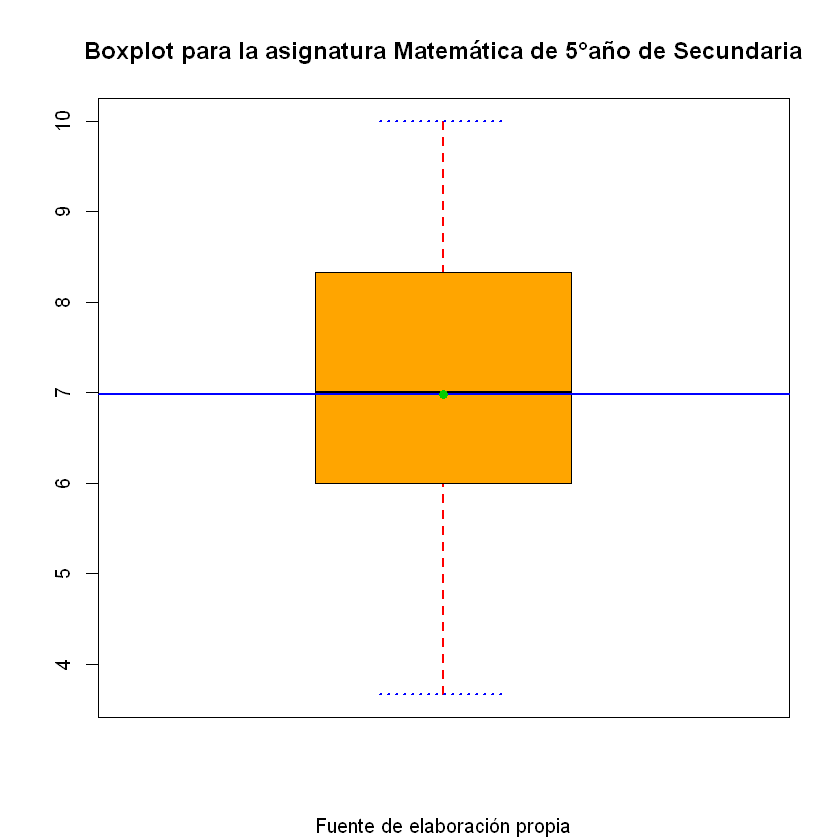

In [30]:
#Quinto
sec_Mat_5<- filter(secundaria_promedios, Curso == 5 & Materia=="MATEMATICA")


#Obtenemos los estadísticos
summary(sec_Mat_5$Promedio)

#Boxplot
boxplot(sec_Mat_5[!is.na(sec_Mat_5$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 5°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,     
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,      
        staplecol = "blue",  
        col ="orange") 

# Añadimos linea de media
abline(h = mean(sec_Mat_5[!is.na(sec_Mat_5$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(sec_Mat_5[!is.na(sec_Mat_5$Promedio),]$Promedio), col = 3, pch = 19)

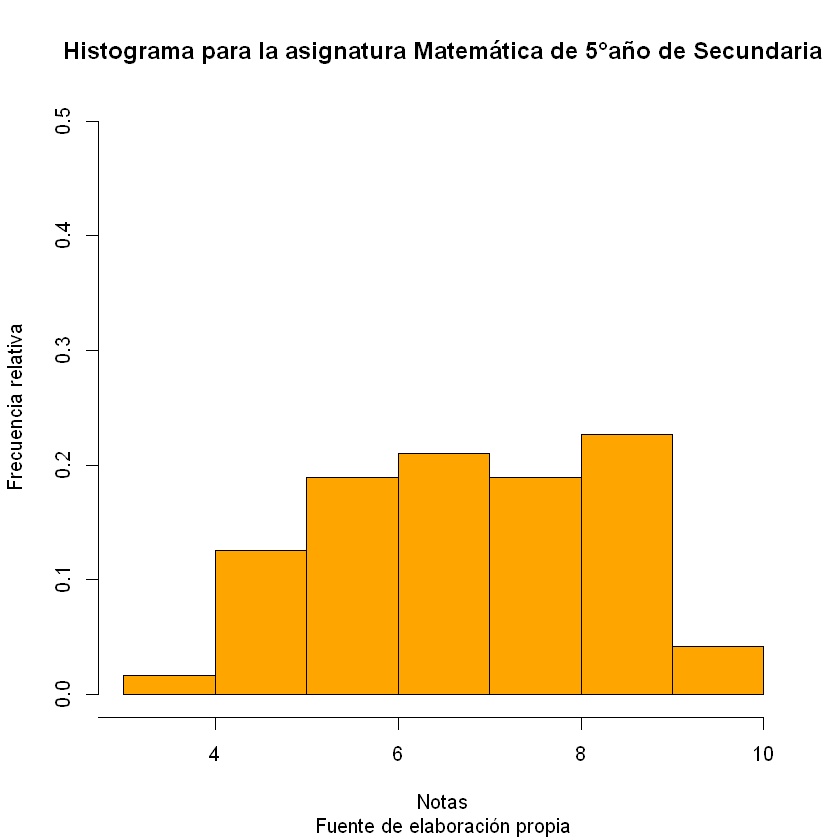

In [43]:
#Histograma para quinto
hist(x = sec_Mat_5$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 5°año de Secundaria",
     sub = "Fuente de elaboración propia")

Promedio,frequency,acumulado
"(1.32,3.07]",8,8
"(3.07,4.8]",23,31
"(4.8,6.53]",85,116
"(6.53,8.27]",109,225
"(8.27,10]",67,292


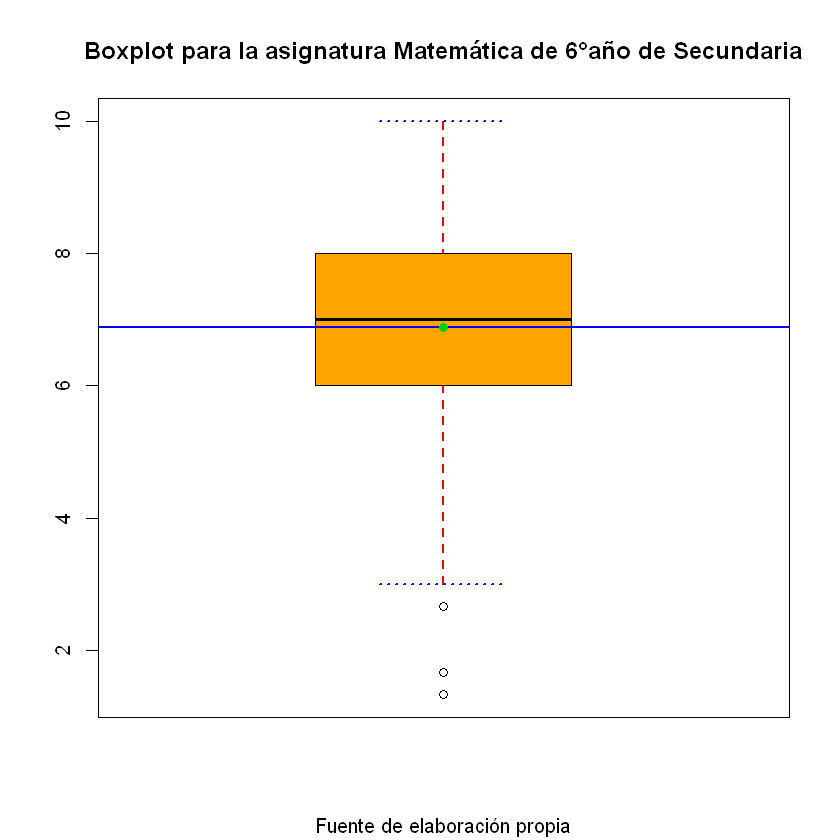

In [32]:
#Sexto 
sec_Mat_6<- filter(secundaria_promedios, Curso == 6 & Materia=="MATEMATICA")


#Obtenemos los estadísticos
summary(sec_Mat_6$Promedio)


#Boxplot
boxplot(sec_Mat_6[!is.na(sec_Mat_6$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 6°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,    
        whiskcol = "red",  
        staplelty = 3,     
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange") 

# Añadimos linea de media
abline(h = mean(sec_Mat_6[!is.na(sec_Mat_6$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(sec_Mat_6[!is.na(sec_Mat_6$Promedio),]$Promedio), col = 3, pch = 19)

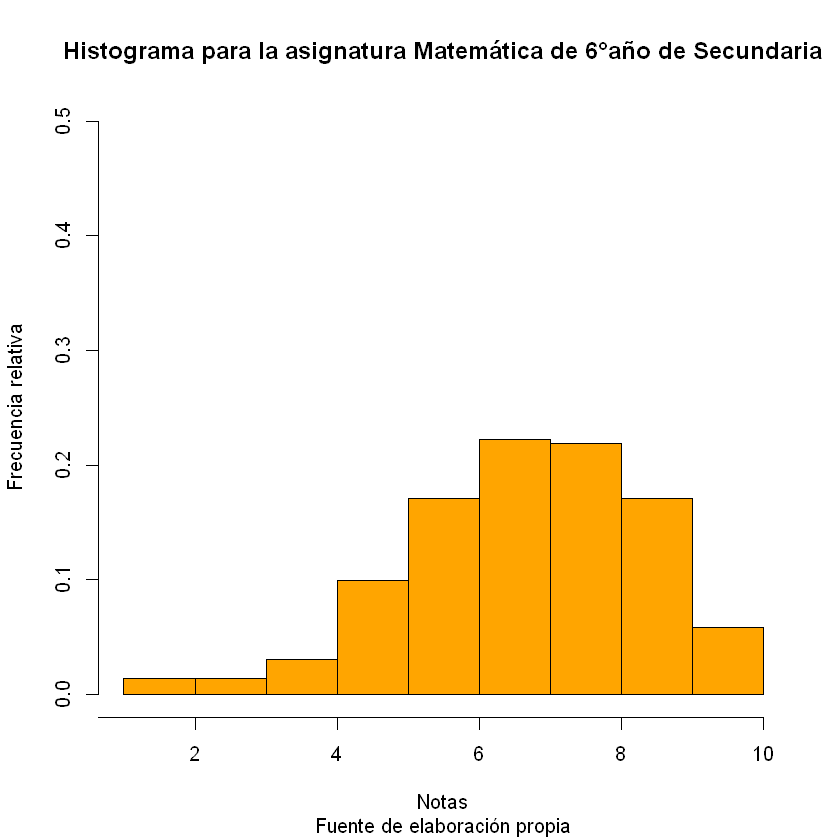

In [44]:
#Histograma para sexto
hist(x = sec_Mat_6$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 6°año de Secundaria",
     sub = "Fuente de elaboración propia")

# Primaria

In [ ]:
#Primero
prim_Mat_1 <- filter(primaria_promedios, Curso== 1 & Materia=="MATEMATICA")


#Obtenemos los estadísticos
summary(prim_Mat_1$Promedio)

#Boxplot
boxplot(prim_Mat_1[!is.na(prim_Mat_1$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 1°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,      
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Mat_1[!is.na(prim_Mat_1$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(prim_Mat_1[!is.na(prim_Mat_1$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma primero
hist(x = prim_Mat_1$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 1°grado de Primaria",
     sub= "Fuente de elaboración propia")

In [ ]:
#Segundo 
prim_Mat_2 <- filter(primaria_promedios, Curso== 2 & Materia=="MATEMATICA")

#Obtenemos los estadísticos
summary(prim_Mat_2$Promedio)

#Boxplot
boxplot(prim_Mat_2[!is.na(prim_Mat_2$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 2°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,      
        whiskcol = "red",  
        staplelty = 3,     
        staplelwd = 2,      
        staplecol = "blue",  
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Mat_2[!is.na(prim_Mat_2$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(prim_Mat_2[!is.na(prim_Mat_2$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para segundo
hist(x = prim_Mat_2$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 2°grado de Primaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Tercero 
prim_Mat_3 <- filter(primaria_promedios, Curso== 3 & Materia=="MATEMATICA")

#Obtenemos los estadísticos
summary(prim_Mat_3$Promedio)

#Boxplot
boxplot(prim_Mat_3[!is.na(prim_Mat_3$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 3°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,      
        staplecol = "blue",
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Mat_3[!is.na(prim_Mat_3$Promedio),]$Promedio), col = 4, lwd = 2) 

# Añadimos punto con la media
points(mean(prim_Mat_3[!is.na(prim_Mat_3$Promedio),]$Promedio), col = 3, pch = 19)|

In [ ]:
#Histograma para tercero
hist(x = prim_Mat_3$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 3°grado de Primaria",
     sub = "Fuente de elaboracion propia")    

In [ ]:
#Cuarto
prim_Mat_4 <- filter(primaria_promedios, Curso== 4 & Materia=="MATEMATICA")

#Obtenemos los estadísticos
summary(prim_Mat_4$Promedio)

boxplot(prim_Mat_4[!is.na(prim_Mat_4$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 4°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange") 

# Añadimos linea de media
abline(h = mean(prim_Mat_4[!is.na(prim_Mat_4$Promedio),]$Promedio), col = 4, lwd = 2) 
# Añadimos punto con la media
points(mean(prim_Mat_4[!is.na(prim_Mat_4$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para cuarto
hist(x = prim_Mat_4$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 4°grado de Primaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Quinto
prim_Mat_5 <- filter(primaria_promedios, Curso== 5 & Materia=="MATEMATICA")

#Obtenemos los estadísticos
summary(prim_Mat_1$Promedio)

#Boxplot
boxplot(prim_Mat_5[!is.na(prim_Mat_5$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 5°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,      
        staplecol = "blue", 
        col ="orange") 

# Añadimos linea de media
abline(h = mean(prim_Mat_5[!is.na(prim_Mat_5$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos punto con la media
points(mean(prim_Mat_5[!is.na(prim_Mat_5$Promedio),]$Promedio), col = 3, pch = 19)


In [ ]:
#Histograma para quinto
hist(x = prim_Mat_5$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 5°grado de Primaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Sexto
prim_Mat_6 <- filter(primaria_promedios, Curso== 6 & Materia=="MATEMATICA")

#Obtenemos los estadísticos
summary(prim_Mat_1$Promedio)

#Boxplot
boxplot(prim_Mat_6[!is.na(prim_Mat_6$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Matemática de 6°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Mat_6[!is.na(prim_Mat_6$Promedio),]$Promedio), col = 4, lwd = 2) 
# Añadimos  punto con la media
points(mean(prim_Mat_6[!is.na(prim_Mat_6$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para sexto 
hist(x = prim_Mat_6$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 6°grado de Primaria",
     sub = "Fuente de elaboración propia")

# Boxplots e Histogramas para Lengua

# Secundaria

In [ ]:
#Primero
sec_Leng_1<- filter(secundaria_promedios, Materia == "LENGUA Y LITERATURA" & Curso == 1)

#Obtenemos los estadísticos
summary(sec_Leng_1$Promedio)

#Boxplot
boxplot(sec_Leng_1[!is.na(sec_Leng_1$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua y Literatura de 1°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange")

# Añadimos linea de media
abline(h = mean(sec_Leng_1[!is.na(sec_Leng_1$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(sec_Leng_1[!is.na(sec_Leng_1$Promedio),]$Promedio), col = 3, pch = 19)


In [ ]:
#Histograma para primero 
hist(x = sec_Leng_1$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Lengua y Literatura de 1°año de Secundaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Segundo
sec_Leng_2<- filter(secundaria_promedios, Materia == "LENGUA Y LITERATURA" & Curso == 2)

#Obtenemos los estadísticos
summary(sec_Leng_2$Promedio)

#Boxplot
boxplot(sec_Leng_2[!is.na(sec_Leng_2$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua y Literatura de 2°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange")

# Añadimos linea de media
abline(h = mean(sec_Leng_2[!is.na(sec_Leng_2$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(sec_Leng_2[!is.na(sec_Leng_2$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para segundo
hist(x = sec_Leng_2$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Lengua y Literatura de 2°año de Secundaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Tercero
sec_Leng_3<- filter(secundaria_promedios, Materia == "LENGUA Y LITERATURA" & Curso == 3)

#Obtenemos los estadísticos
summary(sec_Leng_3$Promedio)

#Boxplot
boxplot(sec_Leng_3[!is.na(sec_Leng_3$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua y Literatura de 3°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange")

# Añadimos linea de media
abline(h = mean(sec_Leng_3[!is.na(sec_Leng_3$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(sec_Leng_3[!is.na(sec_Leng_3$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para tercero
hist(x = sec_Leng_3$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Lengua y Literatura de 3°año de Secundaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Cuarto
sec_Leng_4<- filter(secundaria_promedios, Materia == "LENGUA Y LITERATURA" & Curso == 4)

#Obtenemos los estadísticos
summary(sec_Leng_4$Promedio)

#Boxplot
boxplot(sec_Leng_4[!is.na(sec_Leng_4$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua y Literatura de 4°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange")

# Añadimos linea de media
abline(h = mean(sec_Leng_4[!is.na(sec_Leng_4$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(sec_Leng_4[!is.na(sec_Leng_4$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para cuarto
hist(x = sec_Leng_4$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Lengua y Literatura de 4°año de Secundaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Quinto
sec_Leng_5<- filter(secundaria_promedios, Materia == "LITERATURA LATINOAMERICANA" & Curso == 5)

#Obtenemos los estadísticos
summary(sec_Leng_5$Promedio)

#Boxplot
boxplot(sec_Leng_5[!is.na(sec_Leng_5$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Literatura Latinoamericana de 5°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange")

# Añadimos linea de media
abline(h = mean(sec_Leng_5[!is.na(sec_Leng_5$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(sec_Leng_5[!is.na(sec_Leng_5$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para quinto
hist(x = sec_Leng_5$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Literatura Latinoamericana de 5°año de Secundaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Sexto
sec_Leng_6<- filter(secundaria_promedios, Materia == "LITERATURA ARGENTINA" & Curso == 6)

#Obtenemos los estadísticos
summary(sec_Leng_6$Promedio)

#Boxplot
boxplot(sec_Leng_6[!is.na(sec_Leng_6$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Literatura Argentina de 6°año de Secundaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,      
        whisklwd = 2,       
        whiskcol = "red",   
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue", 
        col ="orange")

# Añadimos linea de media
abline(h = mean(sec_Leng_6[!is.na(sec_Leng_6$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(sec_Leng_6[!is.na(sec_Leng_6$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para sexto
hist(x = sec_Leng_6$Promedio,
     probability = TRUE, 
     col="orange",
     xaxp = c(0, 10, 5),
     ylim = c(0, 0.5),
     xlab="Notas",
     ylab="Frecuencia relativa",
     main ="Histograma para la asignatura Literatura Argentina de 6°año de Secundaria",
     sub = "Fuente de elaboración propia")

# Primaria

In [ ]:
#Primero
prim_Leng_1 <- filter(primaria_promedios, Curso== 1 & Materia=="LENGUA")


#Obtenemos los estadísticos
summary(prim_Leng_1$Promedio)

#Boxplot
boxplot(prim_Leng_1[!is.na(prim_Leng_1$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 1°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,      
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Leng_1[!is.na(prim_Leng_1$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(prim_Leng_1[!is.na(prim_Leng_1$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para primero
hist(x = prim_Leng_1$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 1°grado de Primaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Segundo
prim_Leng_2 <- filter(primaria_promedios, Curso== 2 & Materia=="LENGUA")

#Obtenemos los estadísticos
summary(prim_Leng_2$Promedio)

#Boxplot
boxplot(prim_Leng_2[!is.na(prim_Leng_2$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 2°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,      
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Leng_2[!is.na(prim_Leng_2$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(prim_Leng_2[!is.na(prim_Leng_2$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para segundo
hist(x = prim_Leng_2$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 2°grado de Primaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Tercero
prim_Leng_3 <- filter(primaria_promedios, Curso== 3 & Materia=="LENGUA")

#Obtenemos los estadísticos
summary(prim_Leng_3$Promedio)

#Boxplot
boxplot(prim_Leng_3[!is.na(prim_Leng_3$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 3°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,      
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Leng_3[!is.na(prim_Leng_3$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(prim_Leng_3[!is.na(prim_Leng_3$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para tercero
hist(x = prim_Leng_3$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 3°grado de Primaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Cuarto
prim_Leng_4 <- filter(primaria_promedios, Curso== 4 & Materia=="LENGUA")

#Obtenemos los estadísticos
summary(prim_Leng_4$Promedio)

#Boxplot
boxplot(prim_Leng_4[!is.na(prim_Leng_4$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 4°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,      
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Leng_4[!is.na(prim_Leng_4$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(prim_Leng_4[!is.na(prim_Leng_1$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para cuarto
hist(x = prim_Leng_4$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 4°grado de Primaria",
     sub = "Fuente de elaboración propia")

In [ ]:
#Quinto
prim_Leng_5 <- filter(primaria_promedios, Curso== 5 & Materia=="LENGUA")

#Obtenemos los estadísticos
summary(prim_Leng_5$Promedio)

#Boxplot
boxplot(prim_Leng_5[!is.na(prim_Leng_5$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 5°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,      
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Leng_5[!is.na(prim_Leng_5$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(prim_Leng_5[!is.na(prim_Leng_5$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para quinto
hist(x = prim_Leng_5$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 5°grado de Primaria",
     sub = "Fuente de elaboración propoa")

In [ ]:
#Sexto 
prim_Leng_6 <- filter(primaria_promedios, Curso== 6 & Materia=="LENGUA")

#Obtenemos los estadísticos
summary(prim_Leng_6$Promedio)

#Boxplot
boxplot(prim_Leng_6[!is.na(prim_Leng_6$Promedio),]$Promedio,
        main ="Boxplot para la asignatura Lengua de 1°grado de Primaria",
        horizontal = FALSE,
        sub = "Fuente de elaboración propia",
        whisklty = 2,       
        whisklwd = 2,      
        whiskcol = "red",  
        staplelty = 3,      
        staplelwd = 2,     
        staplecol = "blue",  
        col ="orange")

# Añadimos linea de media
abline(h = mean(prim_Leng_6[!is.na(prim_Leng_6$Promedio),]$Promedio), col = 4, lwd = 2)
# Añadimos  punto con la media
points(mean(prim_Leng_6[!is.na(prim_Leng_6$Promedio),]$Promedio), col = 3, pch = 19)

In [ ]:
#Histograma para sexto
hist(x = prim_Leng_6$Promedio,
     probability = TRUE, 
     col="orange",
     breaks = c(6,6.8,7.6,8.4,9.2,10), 
     xaxp = c(6, 10, 5), 
     ylim = c(0, 0.5),
     xlab="notas",
     ylab="frecuencia relativa",
     main ="Histograma para la asignatura Matemática de 6°grado de Primaria",
     sub = "Fuente de elaboración propia")

# Análisis bivariado

# Comparación notas de Lengua según el sector.

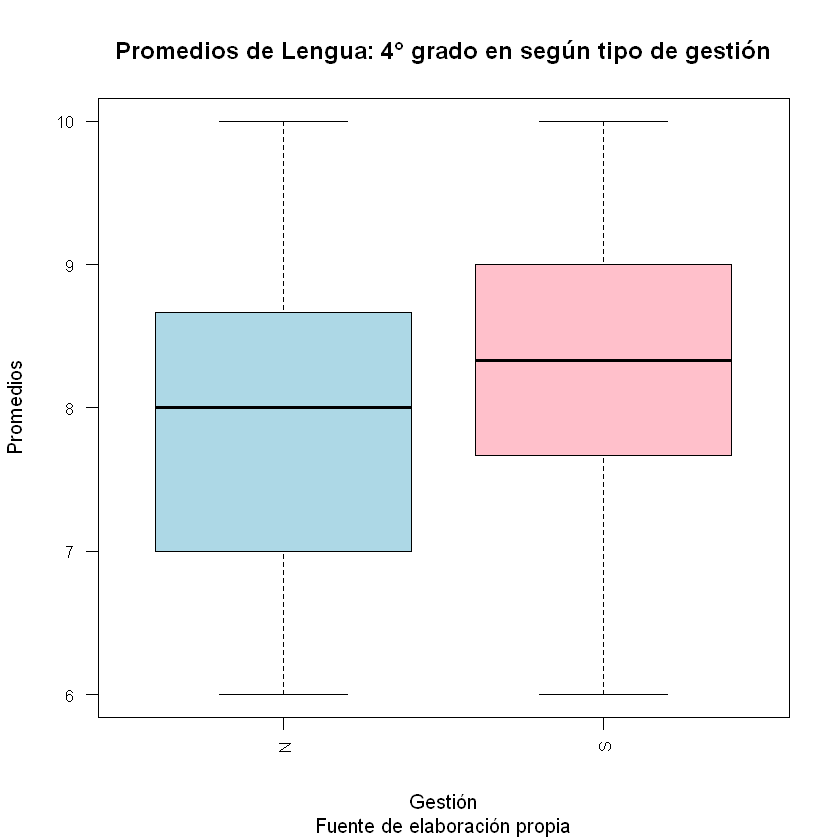

In [20]:
#Para primaria comparamos los 4to grado de escuelas de gestión pública y privada
boxplot( filter(primaria_promedios, Curso== 1 & Materia=="LENGUA")$Promedio ~ filter(primaria_promedios,Curso == 1 & Materia == "LENGUA")$EsPrivada, 
        col = c("lightblue","pink"),
        las = 2, 
        ylab="Promedios", 
        xlab="Gestión",
        cex.axis = 0.8, 
        cex.names= 0.75, 
        main="Promedios de Lengua: 4° grado en según tipo de gestión",
        sub = "Fuente de elaboración propia")

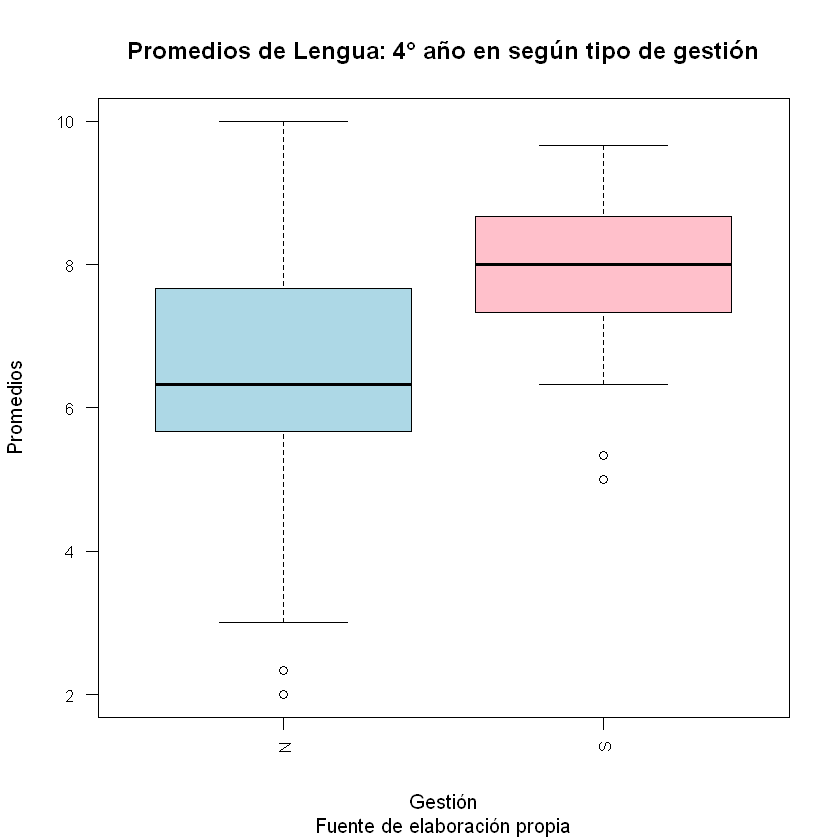

In [21]:
#Mismo procedimiento para segundaria con los 4to año de escuelas de gestión pública y privada

boxplot( filter(secundaria_promedios, Curso== 1 & Materia=="LENGUA Y LITERATURA")$Promedio ~ filter(secundaria_promedios,Curso == 1 & Materia == "LENGUA Y LITERATURA")$EsPrivada, 
        col = c("lightblue","pink"),
        las = 2, 
        ylab="Promedios", 
        xlab="Gestión",
        cex.axis = 0.8, 
        cex.names= 0.75, 
        main="Promedios de Lengua: 4° año en según tipo de gestión",
        sub = "Fuente de elaboración propia")

# Análisis de correlación.

# Primaria

In [43]:
#Creamos un nuevo dataset para ver si existe una correlación entre los promedios de Matemática y lengua


#Corroboramos que tengan la misma dimensión
dim(dplyr::select(filter(primaria_promedios,Materia =="MATEMATICA" & Curso == 4),"DNI","Promedio","EsPrivada"))
dim(dplyr::select(filter(primaria_promedios,Materia=="LENGUA" & Curso == 4),"DNI","Promedio","EsPrivada"))

#Definimos nuestro nuevo dataset
df_primaria<- dplyr::select(filter(primaria_promedios,Materia=="MATEMATICA" & Curso == 4),"DNI","Promedio","EsPrivada") %>% inner_join(dplyr::select(filter(primaria_promedios,Materia == "LENGUA" & Curso == 4),"DNI","Promedio","EsPrivada"),by="DNI")
df_primaria<-rename(df_primaria,Prom_Mat=Promedio.x, Prom_Leng=Promedio.y,EsPrivada=EsPrivada.x)

#Eliminamos los NA
df_primaria <- na.omit(df_primaria)


[1] 857   3

[1] 857   3

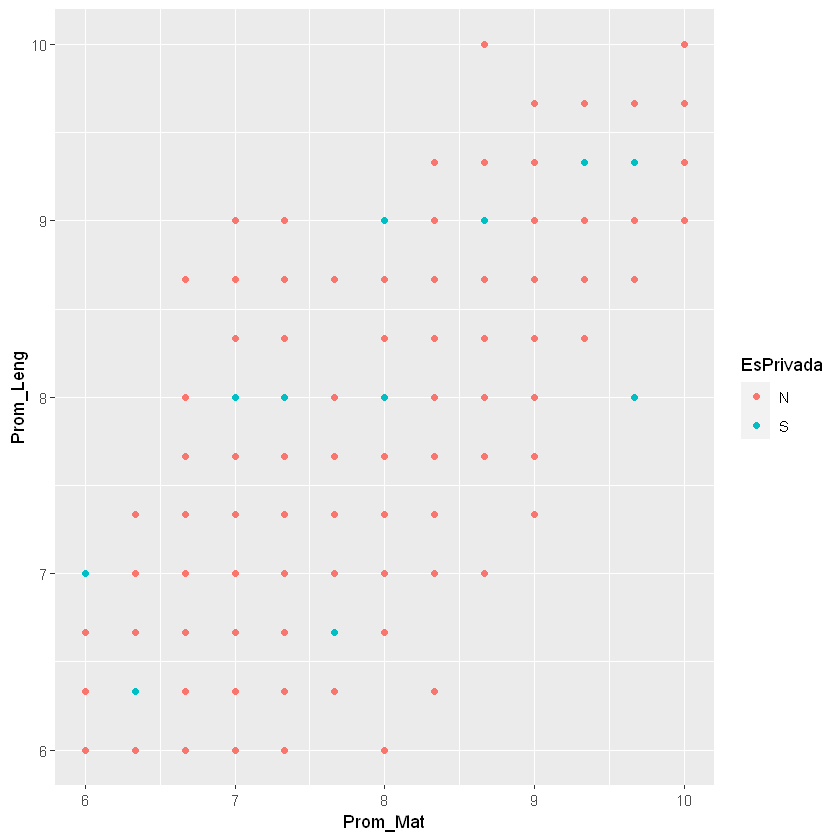

In [30]:
#Realizamos un scatterplot para ver si en un principio existe correlación
ggplot(data=df_primaria, aes(x=Prom_Mat,y=Prom_Leng))+geom_point(aes(colour=EsPrivada)
)+xlab("Prom_Mat")+ylab("Prom_Leng")

`geom_smooth()` using formula 'y ~ x'


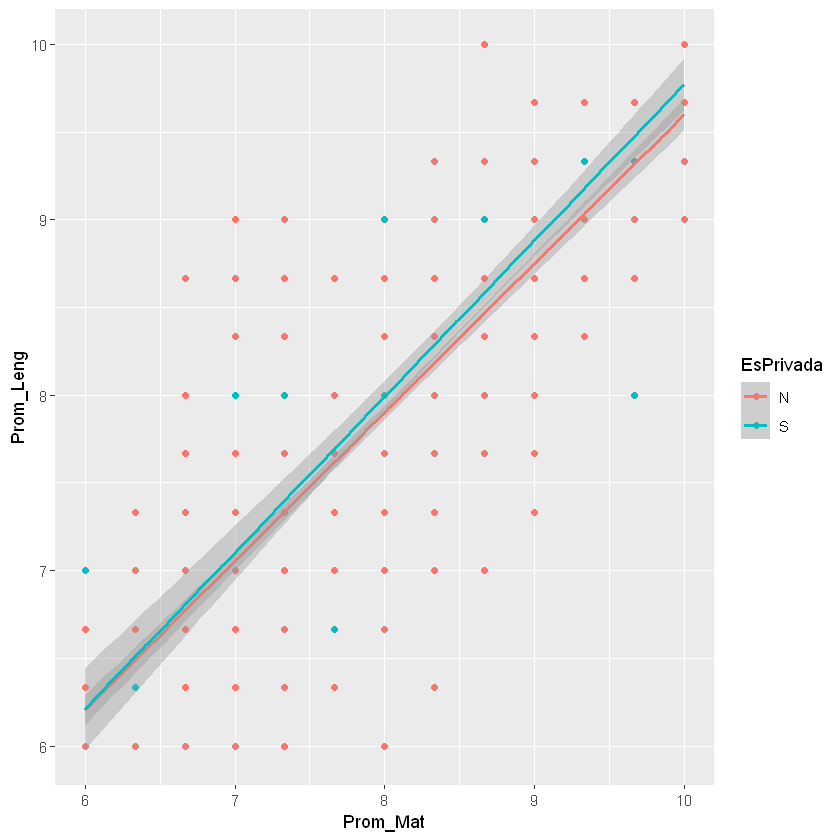

In [34]:
#Graficamos las rectas que mejor se ajustan para nuestra dispersión
ggplot(data=df_primaria, aes(x=Prom_Mat,y=Prom_Leng, color = EsPrivada))+geom_point()+ 
       geom_smooth(method = "lm")


In [62]:
#Análisis de la covarianza
dataMp <- na.omit(data.frame(df_primaria$Prom_Mat, df_primaria$Prom_Leng)) 
dataMp<-rename(dataMp,Prom_Mat=df_primaria.Prom_Mat, Prom_Leng=df_primaria.Prom_Leng)

var(dataMp)

#Análisis de la normalidad de nuestras variables
#Como ambas son mayores a 50 utilizamos el test de Kolmogorov-Smirnov

#Matemática
lillie.test(x = dataMp$Prom_Mat)
#Lengua
lillie.test(x = dataMp$Prom_Leng)

#Revisamos la correlacion
cor(dataMp$Prom_Mat, dataMp$Prom_Leng, method = "spearman") 

,Prom_Mat,Prom_Leng
Prom_Mat,1.063157,0.916450
Prom_Leng,0.916450,1.027523



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataMp$Prom_Mat
D = 0.1027, p-value < 2.2e-16



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataMp$Prom_Leng
D = 0.10209, p-value < 2.2e-16


[1] 0.8768276

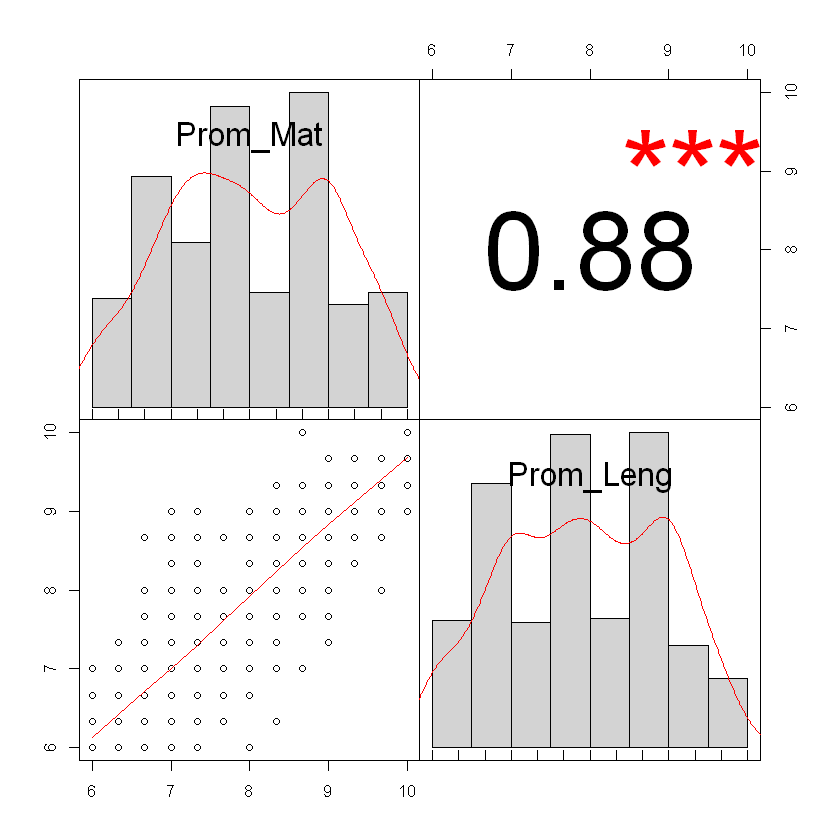

In [66]:
#Graficamos 
chart.Correlation(dataMp, histogram = TRUE, method = "spearman")

# Secundaria

In [57]:
#Corroboramos que tengan la misma dimensión
dim(dplyr::select(filter(secundaria_promedios,Materia =="MATEMATICA" & Curso == 4),"DNI","Promedio","EsPrivada"))
dim(dplyr::select(filter(secundaria_promedios,Materia=="LENGUA Y LITERATURA" & Curso == 4),"DNI","Promedio","EsPrivada"))

#Definimos nuestro nuevo dataset
df_secundaria<- dplyr::select(filter(secundaria_promedios,Materia=="MATEMATICA" & Curso == 4),"DNI","Promedio","EsPrivada") %>% inner_join(dplyr::select(filter(secundaria_promedios,Materia == "LENGUA Y LITERATURA" & Curso == 4),"DNI","Promedio","EsPrivada"),by="DNI")
df_secundaria<-rename(df_secundaria,Prom_Mat=Promedio.x, Prom_Leng=Promedio.y,EsPrivada=EsPrivada.x)

#Eliminamos los NA
df_secundaria <- na.omit(df_secundaria)


[1] 317   3

[1] 326   3

,DNI,Prom_Mat,EsPrivada,Prom_Leng,EsPrivada.y
1,43348491,5.666667,N,6.333333,N
2,44368570,6.333333,N,4.666667,N
3,45338359,9.333333,N,9.000000,N
4,45552837,6.666667,N,6.000000,N
5,45754435,7.333333,N,8.333333,N
7,45754497,7.333333,N,7.666667,N


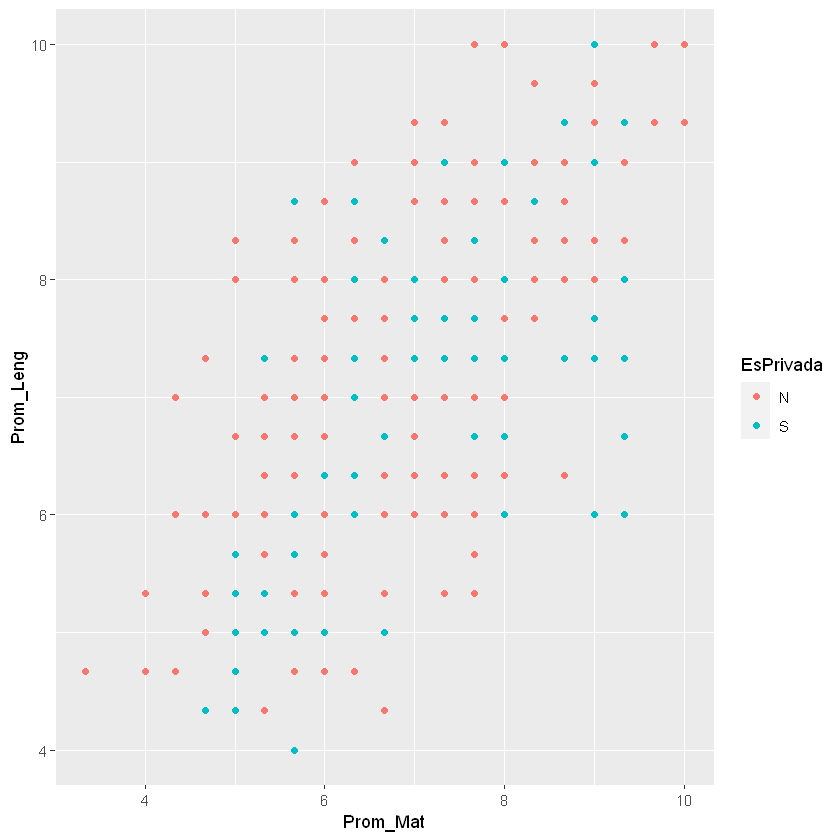

In [58]:
#Realizamos un scatterplot para ver si en un principio existe correlación
ggplot(data=df_secundaria, aes(x=Prom_Mat,y=Prom_Leng))+geom_point(aes(colour=EsPrivada)
)+xlab("Prom_Mat")+ylab("Prom_Leng")

`geom_smooth()` using formula 'y ~ x'


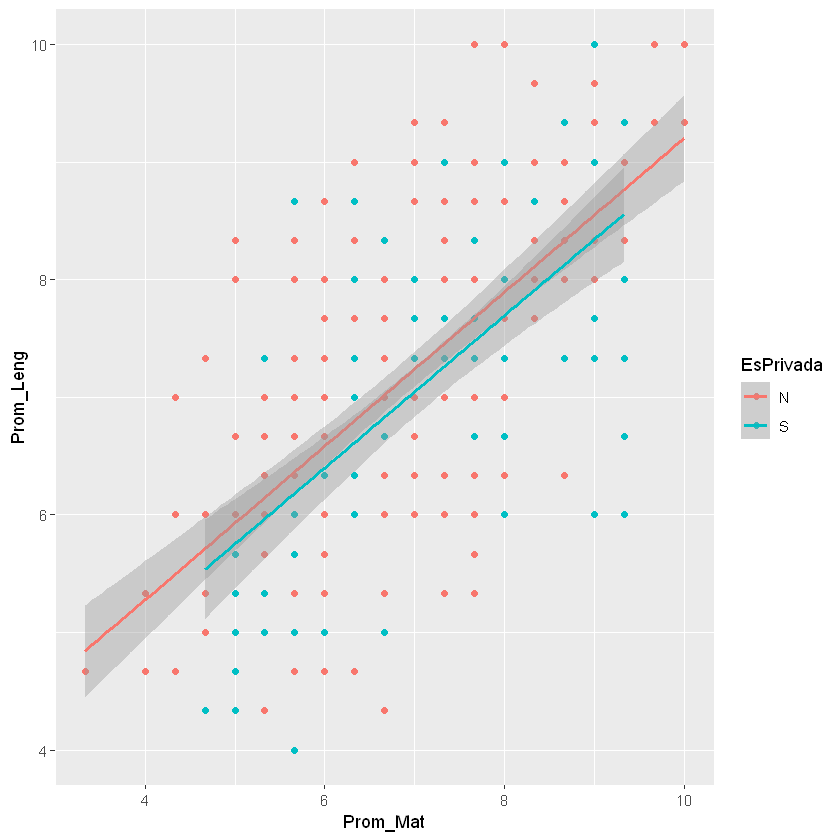

In [67]:
#Graficamos las rectas que mejor se ajustan para nuestra dispersión
ggplot(data=df_secundaria, aes(x=Prom_Mat,y=Prom_Leng, color = EsPrivada))+geom_point()+ 
       geom_smooth(method = "lm")

In [63]:
#Análisis de la covarianza
dataMs <- na.omit(data.frame(df_secundaria$Prom_Mat, df_secundaria$Prom_Leng)) 
dataMs<-rename(dataMs,Prom_Mat=df_secundaria.Prom_Mat, Prom_Leng=df_secundaria.Prom_Leng)

var(dataMs)

#Análisis de la normalidad de nuestras variables
#Como ambas son mayores a 50 utilizamos el test de Kolmogorov-Smirnov

#Matemática
lillie.test(x = dataMs$Prom_Mat)
#Lengua
lillie.test(x = dataMs$Prom_Leng)

#Revisamos la correlacion
cor(dataMs$Prom_Mat, dataMs$Prom_Leng, method = "spearman") 

,Prom_Mat,Prom_Leng
Prom_Mat,1.963276,1.268158
Prom_Leng,1.268158,1.956229



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataMs$Prom_Mat
D = 0.096079, p-value = 2.95e-07



	Lilliefors (Kolmogorov-Smirnov) normality test

data:  dataMs$Prom_Leng
D = 0.076621, p-value = 0.000159


[1] 0.6471021

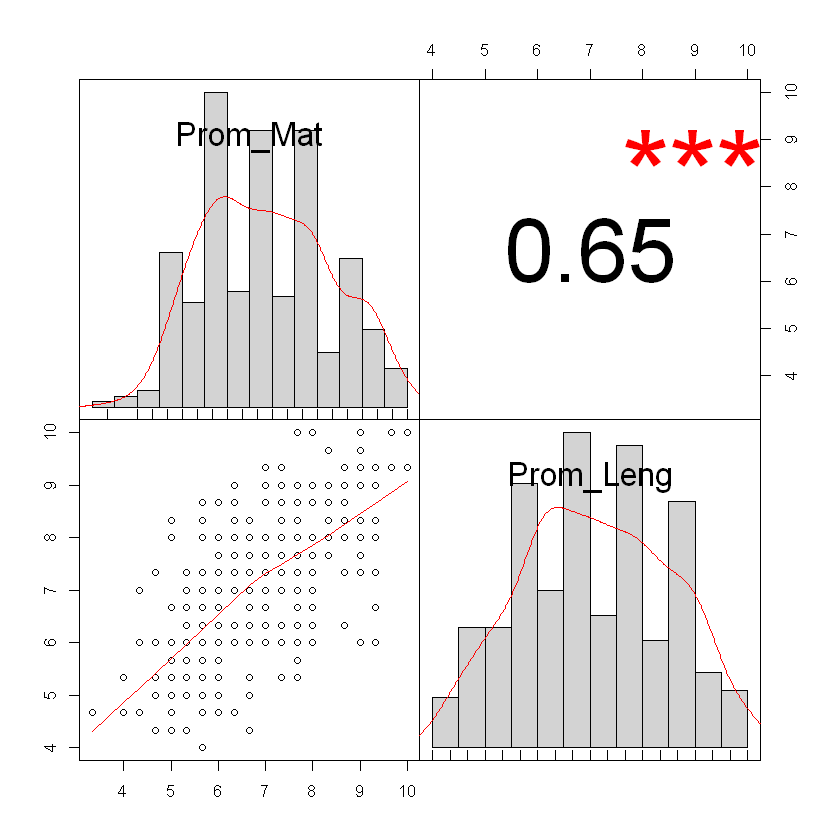

In [65]:
#Graficamos
chart.Correlation(dataMs, histogram = TRUE, method = "spearman")